In [ ]:
import os
import pandas as pd
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

path_control_csv = "../../UKB_Biomarkers.csv"
df_control = pd.read_csv(path_control_csv)
df_control.replace(0, np.nan, inplace=True)
df_control = df_control[df_control['ETDRS_loc']=='1mm']
df_control = df_control[df_control['PID'].str.contains('Anonym')]
df_control1 = df_control[df_control['Age'].str.contains('adult')]

# df_control1[df_control1.eq(0)] = np.nan
df_control = df_control[df_control['Age'].str.contains('pediatric')]
# df_control[df_control.eq(0)] = np.nan
# df_control = df_control[df_control['Laterality']=='OD']
df_control.sort_values(by=["visit_date"], inplace=True, ascending=True)

path_csv = path_control_csv
rpe65_database = pd.read_csv(path_csv)

rpe65_database = rpe65_database[rpe65_database['ETDRS_loc']=='6mm']
rpe65_database.sort_values(by=["MPT"], inplace=True, ascending=True, na_position='first')
rpe65_database['MPT'].replace(np.nan, -100, inplace=True)
rpe65_database['MPT'] = rpe65_database['MPT'].astype(int)
rpe65_database['MPT'] = rpe65_database['MPT'].astype(str)
rpe65_database['MPT'].replace('-100', np.nan, inplace=True)

rpe65_database['MPT'].replace('0', 'BL', inplace=True)
print(rpe65_database['MPT'].unique())
# rpe65_database = rpe65_database[rpe65_database['MPT'] != 24]



[nan '-3' 'BL' '1' '3' '6' '9' '12' '15' '18' '24']


In [2]:
comp_bio = ['EZ_width']
age_u19 = 0
age_u19 = rpe65_database
age_u19['HUE'] = ''
age_u19.loc[age_u19['PID'].str.contains('P004|P005|P009|P011|P012|'), 'HUE'] = 'Pediatric patient bilaterally treated (n=10 eyes)'
age_u19.loc[age_u19['PID'].str.contains('P001|P002|P006|P007|P008|P017'), 'HUE']= 'Adult patient bilaterally treated (n=12 eyes)'
age_u19.loc[age_u19['Laterality'].str.contains('OD') & age_u19['PID'].str.contains('P010|P018|P019|P020|P021'), 'HUE'] = 'Adult patient unilaterally treated (n=10 eyes)'
age_u19.loc[age_u19['Laterality'].str.contains('OS') & age_u19['PID'].str.contains('P003|P013|P015|P016'), 'HUE'] = 'Adult patient unilaterally treated (n=10 eyes)'

patients = ['P005','P004','P012','P011','P009',
            'P016','P002','P013','P001','P007',
            'P008','P003','P017','P015','P018',
            'P006','P019','P010','P014', 
            'P022','P023','P024','P025','P026']
ages = ['7', '9', '9', '17', '19', '22', '23', '23', '28', '28', '28', '29', '29', '30', '31', '32', '38', '39', '40', '10', '10', '10', '10', '10']
sex = ['M', 'M', 'M', 'F', 'M', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'M', 'M', 'M', 'M', 'F', 'F', 'M', 'M', 'M', 'M', 'M']

for idx, p in enumerate(patients):
    p1 = p.replace('P0', 'P')
    if idx > 18:
        p1 = p.replace('P', 'UP')
    newdf = age_u19.loc[age_u19['PID'].str.contains(p)]
    s = ''
    s += f'{p1}'
    s += f'&  {sex[idx]} & {ages[idx]} & '
    for later in ['OS','OD']:
        newdf1 = newdf.loc[newdf['Laterality'] == later]

        if 'OD' in later:
            s += r' \rowcolor[HTML]{D7D7D7} ' + r'& & &'
        
        s += f' {later} ' 
        if idx > 18: 
            base = ''
            m_t = ''
        else:
            base = 'BL' if 'BL' in newdf1['MPT'].unique() else '1' if '1' in newdf1['MPT'].unique() else '-3' # \
                        # if '-3' in newdf1['MPT'].unique() else '3' if '3' in newdf1['MPT'].unique() else '6' \
                        # if '6' in newdf1['MPT'].unique() else '9' if '9' in newdf1['MPT'].unique() else '12' \
                        # if '6' in newdf1['MPT'].unique() else '9' if '9' in newdf1['MPT'].unique() else '15' 
            
            m_t = '12'if '12' in newdf1['MPT'].unique() and base != '12'else '9' \
                    if '9' in newdf1['MPT'].unique()  and base != '9' else '15' \
                    if '15' in newdf1['MPT'].unique() and base != '15' else '18' \
                    if '18' in newdf1['MPT'].unique() and base != '18' else '24'
            
        for idx1, key in enumerate(comp_bio):
            for mpt in ['BL', '1', '3', '6', '9', '12', '15', '18', '24']:
                if idx < 18:
                    newdf2 = newdf1.loc[newdf1['MPT'] == mpt]
                else:
                    newdf2 = newdf1
                m_n = np.round(np.nanmean(newdf2[key]),2)
                s_td = np.round(np.nanstd(newdf2[key]),2)
                
                mean_1 = m_n if m_n >= 0 else '-'
                
                std_1 = s_td if s_td >= 0 else '-'
                if mean_1 != '-': #
                    s += f' & '
                    if mean_1 == std_1 or std_1 == 0: 
                        s += f' ${mean_1}$'
                    else:
                        s += f' ${mean_1} \pm {std_1}$' 
                else:
                    s += f' & '
                
        s += '\\\\ ' + f'\n'
    print(s)

P05&  M & 7 &  OS  &  $5.96$ &  $5.92$ &  $5.95$ &  &  &  &  $5.96$ &  &  $5.96$\\ 
 \rowcolor[HTML]{D7D7D7} & & & OD  &  $5.93$ &  $5.93$ &  $5.93$ &  $5.93$ &  &  &  &  $5.93$ &  $5.93$\\ 

P04&  M & 9 &  OS  &  $3.39$ &  $3.89$ &  $4.17$ &  $4.3$ &  &  $4.24$ &  &  $3.69$ &  $3.21$\\ 
 \rowcolor[HTML]{D7D7D7} & & & OD  &  $3.87$ &  $4.26$ &  $3.39$ &  &  $4.62$ &  &  $4.4$ &  &  $3.68$\\ 

P12&  M & 9 &  OS  &  &  $5.95$ &  $5.94$ &  &  $5.89$ &  $5.75$ &  $5.62$ &  &  $5.49$\\ 
 \rowcolor[HTML]{D7D7D7} & & & OD  &  $4.94$ &  $4.94$ &  $4.91$ &  $4.91$ &  &  &  &  $4.66$ & \\ 

P11&  F & 17 &  OS  &  $0.42$ &  $1.64$ &  &  &  &  &  $1.73$ &  & \\ 
 \rowcolor[HTML]{D7D7D7} & & & OD  &  $0.75$ &  &  &  &  $0.92$ &  &  &  &  $0.88$\\ 

P09&  M & 19 &  OS  &  $1.3$ &  $0.94$ &  &  $1.18$ &  &  &  &  &  $1.12 \pm 0.37$\\ 
 \rowcolor[HTML]{D7D7D7} & & & OD  &  $0.81$ &  $1.86$ &  $1.1 \pm 0.01$ &  $1.65$ &  &  $1.74$ &  &  &  $1.17$\\ 

P16&  M & 22 &  OS  &  &  $3.33$ &  &  $3.06$ &  &  

/tmp/ipykernel_551762/659688036.py:53: RuntimeWarning: Mean of empty slice
  m_n = np.round(np.nanmean(newdf2[key]),2)
/home/alonso/anaconda3/envs/eye_oct/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


/tmp/ipykernel_551762/1737415124.py:76: RuntimeWarning: Mean of empty slice
  m_n = np.round(np.nanmean(newdf2[key]),2)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx a

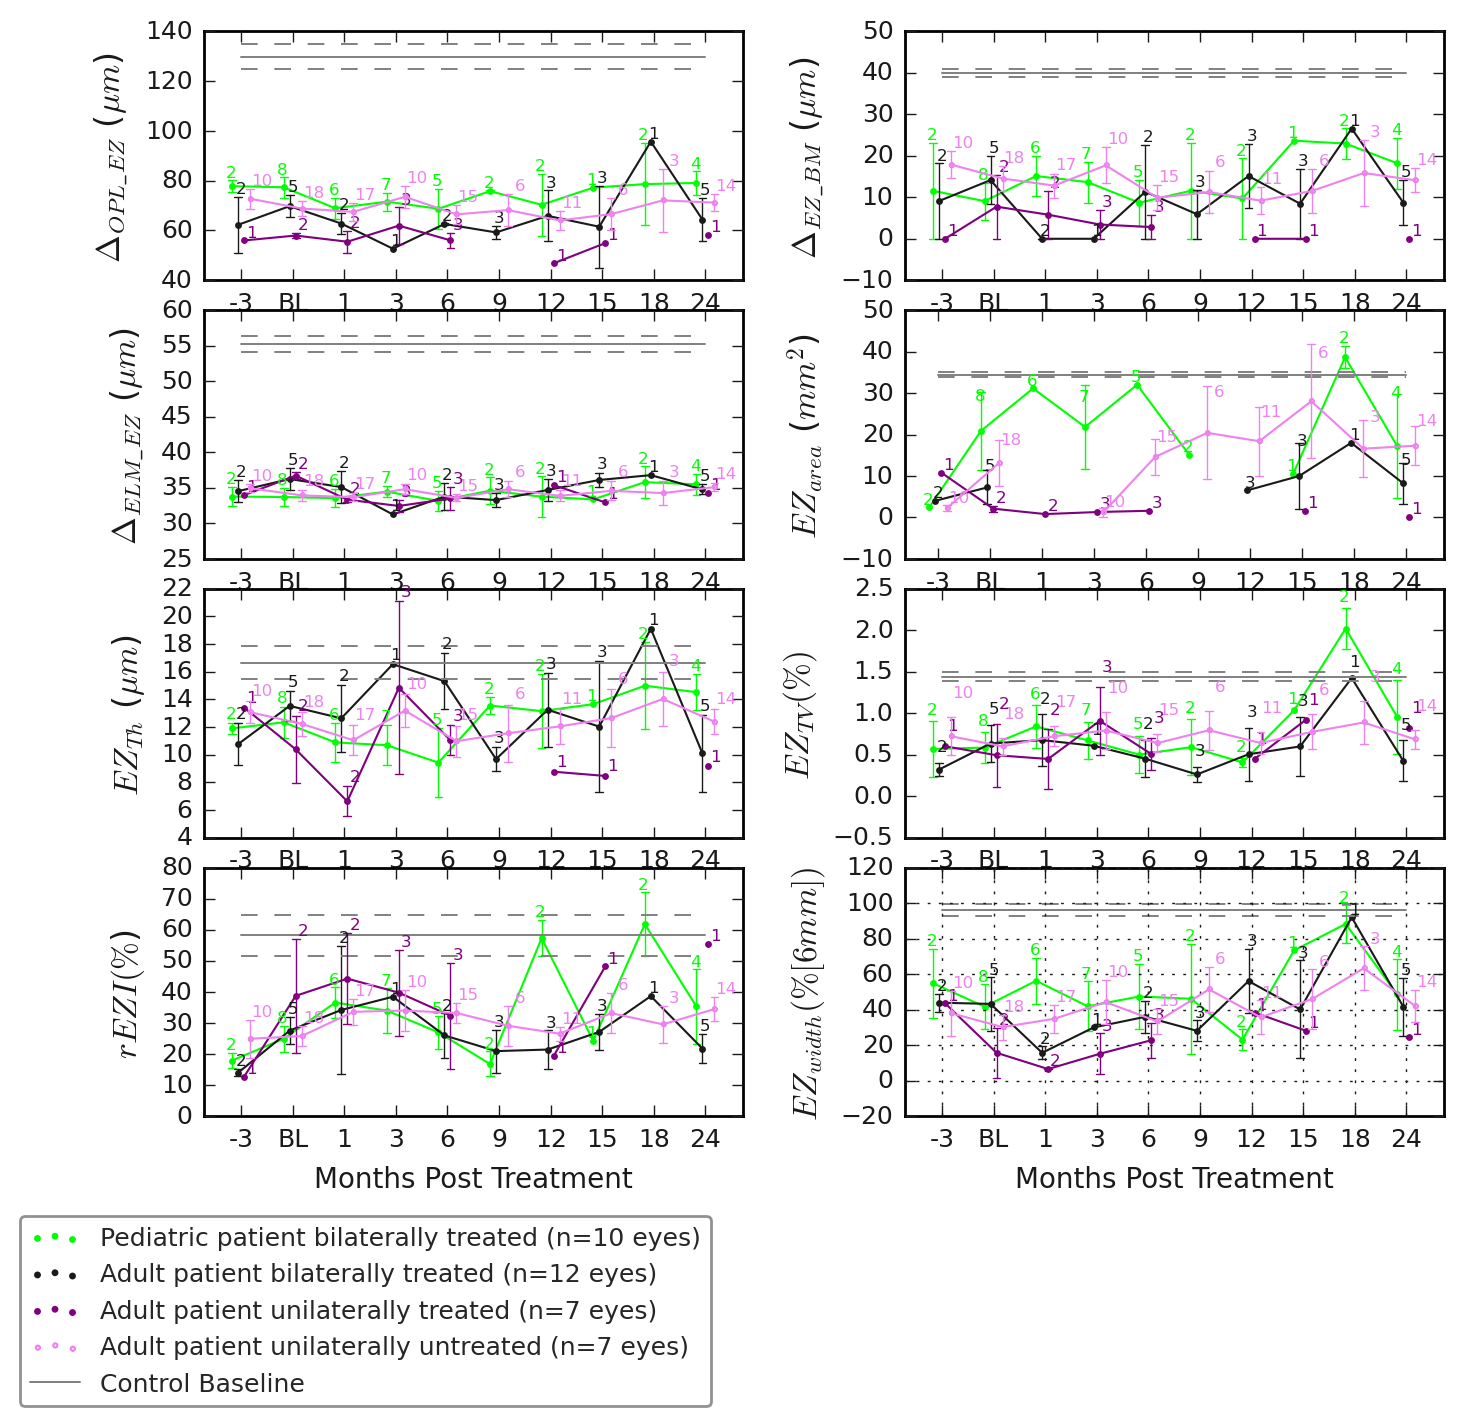

In [3]:
nasal_bio = ['EZ_OPL_mean_nasal',  'EZ_BM_mean_nasal',  'EZ_ELM_mean_nasal', 'ELM_BM_mean_nasal',
             'EZ_th_mean_nasal',   'EZ_TV_mean_nasal',  'rEZI_mean_nasal',   'EZ_diameter']

temp_bio = ['EZ_OPL_mean_temporal',  'EZ_BM_mean_temporal',  'EZ_ELM_mean_temporal', 'ELM_BM_mean_temporal',
            'EZ_th_mean_temporal',   'EZ_TV_mean_temporal',  'rEZI_mean_temporal',   'EZ_diameter']

comp_bio = ['EZ_OPL_mean',  'EZ_ELM_mean', 'EZ_BM_mean',  'Volume_area']#,            
comp_bio = ['EZ_th_mean',   'EZ_TV_mean',  'rEZI_mean',   'EZ_diameter']
comp_bio = ['EZ_OPL_mean',  'EZ_ELM_mean', 'EZ_BM_mean',  'Volume_area', 'EZ_th_mean',   'EZ_TV_mean',  'rEZI_mean',   'EZ_diameter']
# comp_bio = ['EZ_diameter']

list_names = [r'$\Delta_{OPL\_EZ}$ ($\mu m$)', r'$\Delta_{EZ\_BM}$ ($\mu m$)', r'$\Delta_{ELM\_EZ}$ ($\mu m$)', r'$EZ_{area}$ ($mm^2$)',
              r'$EZ_{Th}$ ($\mu m$)',       r'$EZ_{TV} (\%)$',            r'$rEZI (\%$)',               r'$EZ_{width} (\%[6mm])$']
age_u19 = 0
age_u19 = rpe65_database
age_u19['HUE'] = ''
age_u19.loc[age_u19['PID'].str.contains('P004|P005|P009|P011|P012|'), 'HUE'] = 'Pediatric patient bilaterally treated (n=10 eyes)'
age_u19.loc[age_u19['PID'].str.contains('P001|P002|P006|P007|P008|P017'), 'HUE']= 'Adult patient bilaterally treated (n=12 eyes)'

age_u19.loc[age_u19['Laterality'].str.contains('OD') & age_u19['PID'].str.contains('P010|P018|P021'), 'HUE'] = 'Adult patient unilaterally treated (n=7 eyes)'
age_u19.loc[age_u19['Laterality'].str.contains('OS') & age_u19['PID'].str.contains('P003|P013|P015|P016'), 'HUE'] = 'Adult patient unilaterally treated (n=7 eyes)'

age_u19.loc[age_u19['Laterality'].str.contains('OS') & age_u19['PID'].str.contains('P010|P018||P021'), 'HUE'] = 'Adult patient unilaterally untreated (n=7 eyes)'
age_u19.loc[age_u19['Laterality'].str.contains('OD') & age_u19['PID'].str.contains('P003|P013|P015|P016'), 'HUE'] = 'Adult patient unilaterally untreated (n=7 eyes)'

newdf = age_u19.loc[(age_u19.HUE == "Pediatric patient bilaterally treated (n=10 eyes)")]

# patients = ['P001','P002','P003','P004','P005', 'P006','P007',
#             'P008','P009','P010','P011','P012','P013','P014',
#             'P015','P016','P018','P020','P021']

patients = ['P005','P004','P012','P011','P009',
            'P016','P002','P013','P001','P007',
            'P008','P003','P017','P015','P018',
            'P006','P019','P010','P014', 
            'P022','P023','P024','P025','P026']
ages = ['7', '9', '9', '17', '19', '22', '23', '23', '28', '28', '28', '29', '29', '30', '31', '32', '38', '39', '40', '10', '10', '10', '10', '10']
sex = ['M', 'M', 'M', 'F', 'M', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'M', 'M', 'M', 'M', 'F', 'F', 'M', 'M', 'M', 'M', 'M']

for idx, p in enumerate(patients):
    p1 = p.replace('P0', 'P')
    if idx > 18:
        p1 = p.replace('P', 'UP')
    newdf = age_u19.loc[age_u19['PID'].str.contains(p)]
    s = ''
    s += f'{p1}'
    s += f'&  {sex[idx]} & {ages[idx]} & '
    for later in ['OS','OD']:
        newdf1 = newdf.loc[newdf['Laterality'] == later]

        if 'OD' in later:
            s += r' \rowcolor[HTML]{D7D7D7} ' + r'& & &'
        
        s += f' {later} & ' 
        if idx > 18: 
            base = ''
            m_t = ''
        else:
            base = 'BL' if 'BL' in newdf1['MPT'].unique() else '1' if '1' in newdf1['MPT'].unique() else '-3' # \
                        # if '-3' in newdf1['MPT'].unique() else '3' if '3' in newdf1['MPT'].unique() else '6' \
                        # if '6' in newdf1['MPT'].unique() else '9' if '9' in newdf1['MPT'].unique() else '12' \
                        # if '6' in newdf1['MPT'].unique() else '9' if '9' in newdf1['MPT'].unique() else '15' 
            
            m_t = '12'if '12' in newdf1['MPT'].unique() and base != '12'else '9' \
                    if '9' in newdf1['MPT'].unique()  and base != '9' else '15' \
                    if '15' in newdf1['MPT'].unique() and base != '15' else '18' \
                    if '18' in newdf1['MPT'].unique() and base != '18' else '24'
            
        s += f'{m_t}'
        for idx1, key in enumerate(comp_bio):
            for mpt in [base, m_t]:
                if idx < 18:
                    newdf2 = newdf1.loc[newdf1['MPT'] == mpt]
                else:
                    newdf2 = newdf1
                m_n = np.round(np.nanmean(newdf2[key]),2)
                s_td = np.round(np.nanstd(newdf2[key]),2)
                
                mean_1 = m_n if m_n >= 0 else '-'
                
                std_1 = s_td if s_td >= 0 else '-'
                if mean_1 != '-': #
                    s += f' & '
                    if mean_1 == std_1 or std_1 == 0: 
                        s += f' ${mean_1}$'
                    else:
                        s += f' ${mean_1} \pm {std_1}$' 
                else:
                    s += f' & '
                
        s += '\\\\ ' + f'\n'

hue_order = ['Pediatric patient bilaterally treated (n=10 eyes)', 'Adult patient bilaterally treated (n=12 eyes)', 'Adult patient unilaterally treated (n=7 eyes)', 'Adult patient unilaterally untreated (n=7 eyes)']
plt.style.use("classic")
# fig, ax = plt.subplots(3, 2, frameon=True, figsize=(10,4), facecolor='w', dpi=200)
fig, ax = plt.subplots(4, 2, frameon=False, figsize=(8,7),  dpi=200)
idy = 0
idz = 0

# Ensure 'Count' column reflects the unique combination
age_u19['Count'] = age_u19.groupby(['PID', 'Laterality', 'MPT'])['PID'].transform('count')

# Drop duplicates to get unique combinations
unique_combinations = age_u19[['HUE', 'PID', 'Laterality', 'MPT', 'Count']].drop_duplicates()

# Calculate unique counts based on HUE, MPT, and Laterality
unique_counts = unique_combinations.groupby(['HUE', 'MPT']).agg({'Count': 'sum'}).reset_index()


for idx, key in enumerate(comp_bio): # 
    # if 'rEZI' in key or 'EZ_TV' in key:
    #     age_u19.loc[:, key] = age_u19[key]*100
    #     df_control.loc[:, key] = df_control[key]*100
    #     df_control.loc[:, key.replace('mean','std')] = df_control[key.replace('mean','std')] * 100
    #     df_control1.loc[:, key] = df_control1[key]*100
    #     df_control1.loc[:, key.replace('mean','std')] = df_control1[key.replace('mean','std')] * 100
    idy = idx % 2
    idz = idx // 2
    
    sns.set(style="ticks", rc={"lines.linewidth": 0.7})
    point1 = sns.pointplot(data=age_u19, x='MPT', y=key, ax=ax[idz, idy], hue='HUE', scale=0.6, dodge=0.35, hue_order=hue_order,
                           capsize=0.15, errwidth=0.5, errorbar='se', join=True, palette=['lime', 'k', 'purple', 'violet'], markers=['o','o','o','$\circ$',])

    # Unique MPT values sorted
    unique_mpt_values = ['-3', 'BL', '1', '3', '6', '9', '12', '15', '18', '24']

    # Define the mapping between HUE levels and colors
    hue_color_map = {
        'Pediatric patient bilaterally treated (n=10 eyes)': 'lime',
        'Adult patient bilaterally treated (n=12 eyes)': 'k',
        'Adult patient unilaterally treated (n=7 eyes)': 'purple',
        'Adult patient unilaterally untreated (n=7 eyes)': 'violet'
    }

    # Define offsets for each HUE level to avoid overlap
    hue_offset_map = {
        'Pediatric patient bilaterally treated (n=10 eyes)': (-0.2, 0.05),
        'Adult patient bilaterally treated (n=12 eyes)': (0, 0.1),
        'Adult patient unilaterally treated (n=7 eyes)': (0.2, 0.15),
        'Adult patient unilaterally untreated (n=7 eyes)': (0.4, 0.2)
    }
    xlabels = ax[idz, idy].get_xticklabels()
    unique_mpt_values = [label.get_text() for label in xlabels]

    # Annotate points with the number of items
    for hue_level in age_u19['HUE'].unique():
        data_hue = age_u19[age_u19['HUE'] == hue_level]
        for mpt in unique_mpt_values:
            data_mpt = data_hue[data_hue['MPT'] == mpt]
            if not data_mpt.empty:
                mean_val = data_mpt[key].mean()
                n_items = len(data_mpt[key])
                
                x_pos = unique_mpt_values.index(mpt)
                
                # Calculate the standard error for error bars
                std_dev = data_mpt[key].std()
                sample_size = len(data_mpt[key])
                se = std_dev / np.sqrt(sample_size) if sample_size > 0 else 0
                
                if se > 0:
                    y_pos = mean_val + se  # Position above the error bar
                else:
                    y_pos = mean_val
                
                # Set the color based on the hue_level
                text_color = hue_color_map[hue_level]
                
                # Apply offset based on the hue_level
                x_offset, y_offset = hue_offset_map[hue_level]
                ax[idz, idy].text(x_pos + x_offset, y_pos + y_offset, f'{n_items}', color=text_color, ha='center', va='bottom', fontsize=6)
        
    xlabels = ax[idz, idy].get_xticklabels()
    x_control = np.arange(len(xlabels))
    mean_biom = df_control[key].mean()
    std_biom = df_control[key.replace('mean','std')].std()
    if key == 'Volume_area':
        std_biom = df_control[key.replace('mean', 'std')].std()
    mean_biom1 = df_control1[key].mean()
    std_biom1 = df_control1[key.replace('mean','std')].std()

    x_ = np.linspace(0, len(rpe65_database['MPT'].unique())-2, len(rpe65_database['MPT'].unique())-1)
    y_ = [mean_biom for i in range(len(x_))]
    y_1 = [std_biom for i in range(len(x_))]
    sns.lineplot(x=x_, y=np.add(y_, y_1), linestyle='--',ax=ax[idz, idy], dashes=True, color='gray', errorbar='se', label='')
    sns.lineplot(x=x_, y=y_, ax=ax[idz, idy], color='gray', errorbar='se', label='Control Baseline') # Pediatric Control (n=8 eyes)
    sns.lineplot(x=x_, y=np.subtract(y_, y_1), linestyle='--',ax=ax[idz, idy], dashes=True, color='gray', errorbar='se', label='') # Adult Control (n=10 eyes)

    ax[idz, idy].legend([],[], frameon=False)

    max_val = max([age_u19[key].mean(), mean_biom])
    min_val = min([age_u19[key].mean(), mean_biom])

    ax[idz, idy].set_xlabel('', fontsize=1)
    ax[3, 0].set_xlabel('Months Post Treatment', fontsize=10)
    ax[3, 1].set_xlabel('Months Post Treatment', fontsize=10)
    # ax[1, 2].set_xlabel('Months Post Treatment', fontsize=10)
    # ax[1, 3].set_xlabel('Months Post Treatment', fontsize=10)
    
    ax[idz, idy].set_ylabel(f'{list_names[idx]} ', fontsize=12)
    ax[idz, idy].tick_params(axis='both', which='major', labelsize=9)
    # ax[idz, idy].set_yscale('symlog')
    save_file = key.replace('_mean', '')
    idy += 1
plt.grid(True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.12)
plt.legend(bbox_to_anchor=(-1, -0.35), loc="upper center", fontsize="9", ncol=1, fancybox=True, framealpha=0.5, frameon=True, numpoints=1) #
plt.savefig(f'../../results/plots/bio_history.svg')


In [4]:
import numpy as np

# Given data
data = [
    {'SPH': -2.50, 'CYL': -1.75, 'AXIS': 83},
    {'SPH': -3.50, 'CYL': -1.50, 'AXIS': 171},
    {'SPH': -8.25, 'CYL': -2.50, 'AXIS': 18},
    {'SPH': 0.00, 'CYL': -1.75, 'AXIS': 7},
    {'SPH': +4.00, 'CYL': -2.25, 'AXIS': 170},
    {'SPH': +4.00, 'CYL': -1.75, 'AXIS': 4},
    {'SPH': -6.25, 'CYL': -3.00, 'AXIS': 174},
    {'SPH': +3.00, 'CYL': -1.25, 'AXIS': 24},
    {'SPH': -2.00, 'CYL': -4.50, 'AXIS': 6},
    {'SPH': -0.25, 'CYL': -2.50, 'AXIS': 167},
    {'SPH': -2.00, 'CYL': -3.50, 'AXIS': 12},
    {'SPH': +3.75, 'CYL': +2.25, 'AXIS': 5},
    {'SPH': +2.25, 'CYL': -0.50, 'AXIS': 167},
    {'SPH': 0.00, 'CYL': -1.50, 'AXIS': 25},
    {'SPH': -3.00, 'CYL': -3.00, 'AXIS': 28},
    {'SPH': -2.75, 'CYL': -0.75, 'AXIS': 32},
    {'SPH': +1.00, 'CYL': -1.25, 'AXIS': 156},
    {'SPH': +0.50, 'CYL': -3.25, 'AXIS': 12},
    {'SPH': -4.25, 'CYL': -0.50, 'AXIS': 29},
    {'SPH': -7.25, 'CYL': -4.25, 'AXIS': 4},
    {'SPH': -2.25, 'CYL': -2.00, 'AXIS': 163},
    {'SPH': -1.25, 'CYL': -2.25, 'AXIS': 160},
    {'SPH': +5.00, 'CYL': -2.00, 'AXIS': 0}
]

# Extract values for SPH, CYL, and AXIS
sph_values = [entry['SPH'] for entry in data]
cyl_values = [entry['CYL'] for entry in data]
axis_values = [entry['AXIS'] for entry in data]

# Calculate mean and standard deviation for SPH
mean_sph = np.mean(sph_values)
std_sph = np.std(sph_values)

# Calculate mean and standard deviation for CYL
mean_cyl = np.mean(cyl_values)
std_cyl = np.std(cyl_values)

# Calculate mean and standard deviation for AXIS
mean_axis = np.mean(axis_values)
std_axis = np.std(axis_values)

print(f"Mean SPH: {mean_sph:.2f}")
print(f"Standard Deviation SPH: {std_sph:.2f}")
print(f"Mean CYL: {mean_cyl:.2f}")
print(f"Standard Deviation CYL: {std_cyl:.2f}")
print(f"Mean AXIS: {mean_axis:.2f}")
print(f"Standard Deviation AXIS: {std_axis:.2f}")


Mean SPH: -0.96
Standard Deviation SPH: 3.57
Mean CYL: -1.97
Standard Deviation CYL: 1.38
Mean AXIS: 70.30
Standard Deviation AXIS: 71.78


In [5]:
import pandas as pd
from scipy.stats import wilcoxon, mannwhitneyu, shapiro, normaltest, ttest_ind
import random
df = pd.read_csv(path_control_csv)

nasal_bio = ['rEZI_mean_nasal',  'EZ_TV_mean_nasal',   'EZ_th_mean_nasal',    
             'EZ_OPL_mean_nasal',  'EZ_BM_mean_nasal',  'EZ_ELM_mean_nasal', 'ELM_BM_mean_nasal', 'rEZI_mean_temporal',  'EZ_th_mean_temporal',   'EZ_TV_mean_temporal',   
             'EZ_OPL_mean_temporal',  'EZ_BM_mean_temporal',  'EZ_ELM_mean_temporal', 'ELM_BM_mean_temporal',]

comp_bio = ['rEZI_mean', 'EZ_TV_mean', 'EZ_th_mean',  'EZ_OPL_mean',  'EZ_ELM_mean', 'EZ_BM_mean', 'ELM_BM_mean']

list_names = [r'$rEZI (\%$)', 
              r'$EZ_{TV} (\%)$', 
              r'$EZ_{Th}$ ($\mu m$)', 
              r'$\Delta_{OPL\_EZ}$ ($\mu m$)', 
              r'$\Delta_{ELM\_EZ}$ ($\mu m$)',
              r'$\Delta_{BM\_EZ}$ ($\mu m$)',
              r'$\Delta_{ELM\_BM}$ ($\mu m$)']
for idx, key1 in enumerate(comp_bio):
    # print(key1)
    s = ''
    s = '\multirow{1}{*}{'
    s += list_names[idx]
    s += '}'
    df_no_zero = df[df[key1] != 0]
    lateral = df
    # for lat in ['OD', 'OS']:
    #     s += ' & ' + lat
    # lateral = lateral[lateral['MPT'] == 0]
    lateral = lateral[lateral['ETDRS_loc'] == '0.5mm']
    # g_c = lateral[lateral['Patient']=='control']
    # g_c = g_c[g_c['Age']=='pediatric']
    # g_r = lateral[lateral['Patient']=='RPE65']
    # g_r = g_r[g_r['Age']=='pediatric']
    # g_c = random.sample(list(g_c[key1]), 20)
    # g_r = random.sample(list(g_r[key1]), 20)
    # g_r = lateral[lateral['MPT']=='BL']
    # g_r = g_r[g_r['Age']=='adult']
    # plt.figure()
    # hist = g_c[key].hist(bins=10)
    # plt.show()
    
    # plt.figure()
    # hist = g_c[key1].hist(bins=50)
    # sns.kdeplot(g_c[key1], fill=True, color='blue', label='Sample Data')
    # plt.show()
    # print(key1)
    # print("Shapiro Helthy Control: p < {:.4f}".format(shapiro(g_c[key])[1]))
    # print("Shapiro RPE65-IRD: p < {:.4f}".format(shapiro(g_r[key])[1]))
    group1 = lateral[lateral['Patient']=='RPE65']
    group1 = group1[lateral['Age']=='pediatric']
    
    group2 = lateral[lateral['Patient']=='RPE65']
    group2 = group2[lateral['Age']=='adult']
    group2 = group2[group2['MPT'] == 0]

    for side in ['nasal', 'temporal']:
        # for etdrs in ['0.5mm']: #['0.5mm', '1mm', '2mm', '3mm', '6mm']:
        # print("///// ETDRS loc: ", etdrs, '///// Laterality:', l)
        key = key1 + '_' + side
        # group2 = random.sample(list(group2[key]), 20)
        # group1 = group1
        # group2 = group2
        # print(group1)
        # group2 = group2[group2['HUE']=='Pediatric patient bilaterally treated (n=10 eyes)']
        norm_test2 = shapiro(group2[key])
        # norm_test1 = shapiro(group1[key])
        if 'ELM_EZ' in key1 or 'rEZI' in key1:
            # print('shw-test')
            test = mannwhitneyu(group1[key], group2[key])
        else:
            # print('shw-test', norm_test2[1])
            test = ttest_ind(group1[key], group2[key])
            # print('t-test', norm_test2[1])
        # test = ttest_ind(group1[key], group2[key])
        # print(f'{key}:\t', "{:.2f},  \t {:.2f},  \t {:.4f}".format(np.mean(group1), np.mean(group2), test[1]))
        f"{key.replace('_mean','')} & &",                 # + " & $<{:.4f}$ ".format(norm_test1[1] if norm_test1[1] > 0.0001 else 0.0001) \
        s += " & ${:.3f}\pm{:.2f}$".format(np.asarray(group1[key]).mean(),np.asarray(group1[key.replace('mean', 'std')]).mean()) \
            + " & ${:.3f}\pm{:.2f}$ ".format(np.asarray(group2[key]).mean(),np.asarray(group2[key.replace('mean', 'std')]).mean()) \
            + " & $<{:.4f}$ ".format(test[1] if test[1] > 0.0001 else 0.0001) 
            # + " & $<{:.4f}$ ".format(norm_test2[1] if norm_test2[1] > 0.0001 else 0.0001)
            
    s += '\\\\ '
    print(s)


\multirow{1}{*}{$rEZI (\%$)} & $42.389\pm5.33$ & $27.925\pm6.98$  & $<0.0023$  & $39.997\pm3.73$ & $32.370\pm9.92$  & $<0.0207$ \\ 
\multirow{1}{*}{$EZ_{TV} (\%)$} & $1.395\pm0.14$ & $0.871\pm0.13$  & $<0.0002$  & $1.293\pm0.14$ & $0.842\pm0.17$  & $<0.0001$ \\ 
\multirow{1}{*}{$EZ_{Th}$ ($\mu m$)} & $16.267\pm2.32$ & $16.205\pm2.94$  & $<0.9620$  & $16.149\pm2.16$ & $13.817\pm3.64$  & $<0.0803$ \\ 
\multirow{1}{*}{$\Delta_{OPL\_EZ}$ ($\mu m$)} & $91.920\pm4.77$ & $76.094\pm6.52$  & $<0.0009$  & $90.757\pm5.01$ & $72.694\pm8.33$  & $<0.0001$ \\ 
\multirow{1}{*}{$\Delta_{ELM\_EZ}$ ($\mu m$)} & $23.020\pm2.93$ & $6.005\pm1.03$  & $<0.0001$  & $22.925\pm3.25$ & $6.449\pm0.82$  & $<0.0001$ \\ 
\multirow{1}{*}{$\Delta_{BM\_EZ}$ ($\mu m$)} & $38.518\pm3.15$ & $35.444\pm3.62$  & $<0.0745$  & $38.656\pm3.31$ & $34.918\pm3.55$  & $<0.0134$ \\ 
\multirow{1}{*}{$\Delta_{ELM\_BM}$ ($\mu m$)} & $61.029\pm2.34$ & $16.674\pm0.85$  & $<0.0001$  & $59.661\pm2.40$ & $17.120\pm0.66$  & $<0.0001$ \\ 


/tmp/ipykernel_551762/3542184217.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1 = group1[lateral['Age']=='pediatric']
/tmp/ipykernel_551762/3542184217.py:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2 = group2[lateral['Age']=='adult']


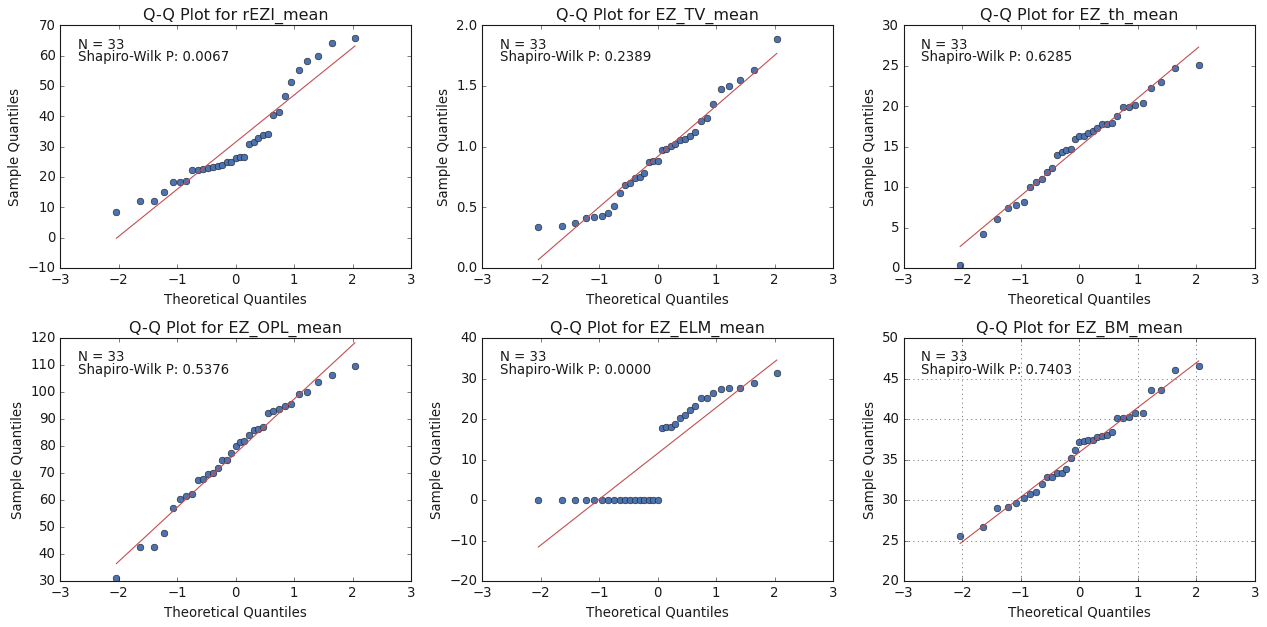

In [6]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Select the biomarker for the Q-Q plot
biomarker_list = ['rEZI_mean', 'EZ_TV_mean', 'EZ_th_mean', 'EZ_OPL_mean', 'EZ_ELM_mean', 'EZ_BM_mean']
df_no_zero = df[df[key1] != 0]
lateral = df
lateral = lateral[(lateral['MPT'] == 0)] #  | (lateral['MPT'] == 1)
lateral = lateral[lateral['ETDRS_loc'] == '0.5mm']

group1 = df_no_zero[df_no_zero['Patient']=='control']
group1 = group1[group1['ETDRS_loc'] == '1mm']

# Generate Q-Q plots for each biomarker
plt.style.use('classic')
fig, axes = plt.subplots(2, 3, frameon=False,figsize=(16, 8))
axes = axes.flatten()

for i, biomarker in enumerate(biomarker_list):
    # Filter the data for patient RPE65
    patient_data = lateral
    patient_data = lateral[lateral['Patient'] == 'RPE65']
    # patient_data = patient_data[patient_data['Age'] == 'adult']

    # Get the biomarker values for patient RPE65
    biomarker_values = patient_data[biomarker]
    biomarker_control = group1[biomarker]
    biomarker_control = random.sample(list(biomarker_control), 18)
    # Generate the Q-Q plot
    
    # stats.probplot(biomarker_control, dist='norm', plot=axes[i], fit=False)
    
    stats.probplot(biomarker_values, dist='norm', plot=axes[i], fit=True)
    axes[i].get_lines()[0].set_markerfacecolor('C0')
    # axes[i].get_lines()[1].set_markerfacecolor('C1')
    
    axes[i].set_title(f'Q-Q Plot for {biomarker}')
    axes[i].set_xlabel('Theoretical Quantiles')
    axes[i].set_ylabel('Sample Quantiles')
    # Perform Shapiro-Wilk test
    shapiro_test = stats.shapiro(biomarker_values)
    shapiro_test_c = stats.shapiro(biomarker_control)
    # Add Shapiro-Wilk test result to the plot
    axes[i].text(0.05, 0.9, f"Shapiro-Wilk P: {shapiro_test.pvalue:.4f}", transform=axes[i].transAxes, ha='left', va='top')
    # axes[i].text(0.05, 0.85, f"Shapiro-Wilk Control: {shapiro_test_c.pvalue:.4f}", transform=axes[i].transAxes, ha='left', va='top')
    # Add N value to the plot
    axes[i].text(0.05, 0.95, f"N = {biomarker_values.count()}", transform=axes[i].transAxes, ha='left', va='top')
plt.grid(True)
plt.tight_layout()
plt.show()

{'rEZI_mean': 0.9999999999999999, 'EZ_TV_mean': -0.06498015418232825, 'EZ_th_mean': 0.05545804373796081, 'EZ_OPL_mean': 0.05070275118651761, 'EZ_ELM_mean': 0.2621909344128342, 'EZ_BM_mean': -0.13185579374150147, 'ELM_BM_mean': 0.14947169040336286}


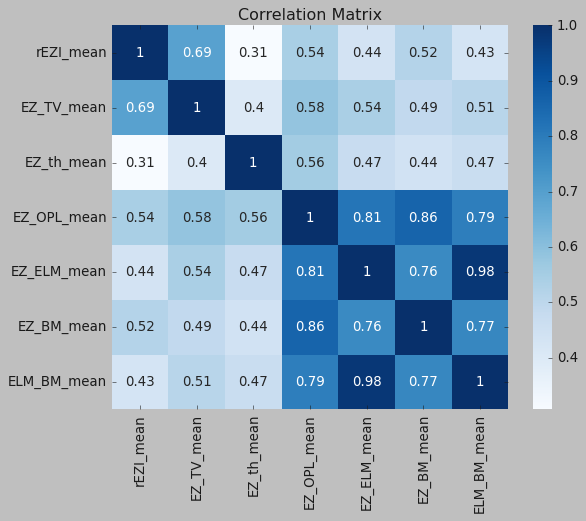

{'rEZI_mean': 0.9999999999999996,
 'EZ_TV_mean': 0.6011396150616932,
 'EZ_th_mean': 0.281739130576882,
 'EZ_OPL_mean': 0.42457095661929867,
 'EZ_ELM_mean': 0.05066146402596904,
 'EZ_BM_mean': 0.29548403725983097,
 'ELM_BM_mean': 0.03150564241106535}

In [7]:
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
comp_bio = ['rEZI_mean',  'EZ_TV_mean', 'EZ_th_mean', 'EZ_OPL_mean',  'EZ_ELM_mean', 'EZ_BM_mean',  'ELM_BM_mean']

correlations = {}
for var in comp_bio:
    df_cleaned = df.replace([np.inf, -np.inf], np.nan).dropna()
    corr, _ = pearsonr(df_cleaned[var], df_cleaned['rEZI_mean'])
    correlations[var] = corr

print(correlations)

correlation_matrix = df[comp_bio].corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()
{'rEZI_mean': 0.9999999999999996, 
 'EZ_TV_mean': 0.6011396150616932, 
 'EZ_th_mean': 0.281739130576882, 
 'EZ_OPL_mean': 0.42457095661929867, 
 'EZ_ELM_mean': 0.05066146402596904, 
 'EZ_BM_mean': 0.29548403725983097, 
 'ELM_BM_mean': 0.03150564241106535}


Statistic: 0.9926937818527222, p-value: 0.8689165711402893


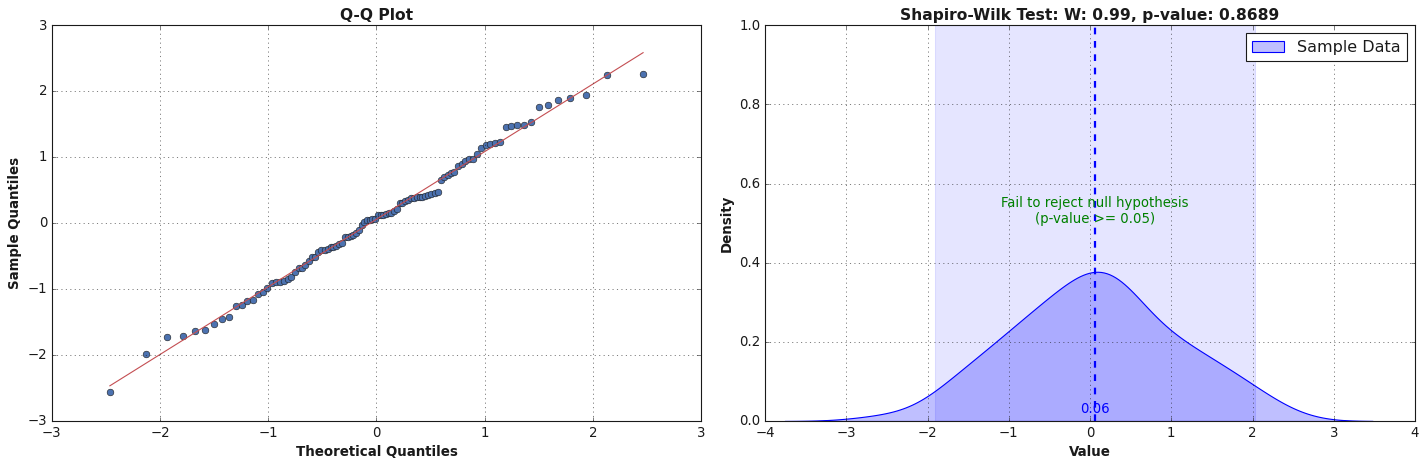

In [8]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Generate sample data
np.random.seed(0)
sample_data = np.random.normal(loc=0, scale=1, size=100)

# Perform Shapiro-Wilk test
stat, p_value = stats.shapiro(sample_data)
print(f'Statistic: {stat}, p-value: {p_value}')

# Create KDE plot for the sample data
plt.figure(figsize=(18, 6), frameon=False)

plt.subplot(1, 2, 2)
sns.kdeplot(sample_data, fill=True, color='blue', label='Sample Data')

# Calculate the mean and confidence intervals
mean_data = np.mean(sample_data)
std_data = np.std(sample_data)
lower_bound = stats.norm.ppf(0.025, mean_data, std_data)
upper_bound = stats.norm.ppf(0.975, mean_data, std_data)

# Highlight the mean
plt.axvline(mean_data, color='blue', linestyle='--', linewidth=2)
plt.text(mean_data, 0.02, f'{mean_data:.2f}', horizontalalignment='center', color='blue')

# Add rejection zones
plt.fill_betweenx([0, 1], lower_bound, upper_bound, color='blue', alpha=0.1)

# Add test results to the plot
plt.title(f'Shapiro-Wilk Test: W: {stat:.2f}, p-value: {p_value:.4f}', fontsize=14, fontweight='bold')
plt.xlabel('Value', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')

# Interpretation
if p_value < 0.05:
    plt.text(mean_data, 0.5, 'Reject null hypothesis\n(p-value < 0.05)', horizontalalignment='center', color='red')
else:
    plt.text(mean_data, 0.5, 'Fail to reject null hypothesis\n(p-value >= 0.05)', horizontalalignment='center', color='green')

plt.legend()
plt.grid(True)

# Create Q-Q plot
plt.subplot(1, 2, 1)
res = stats.probplot(sample_data, dist="norm", plot=plt)
plt.title('Q-Q Plot', fontsize=14, fontweight='bold')
plt.xlabel('Theoretical Quantiles', fontsize=12, fontweight='bold')
plt.ylabel('Sample Quantiles', fontsize=12, fontweight='bold')

plt.grid(True)
plt.tight_layout()
plt.savefig(f'../../results/plots/normal_stat.svg')


Statistic: 139.0, p-value: 0.05446250397189108


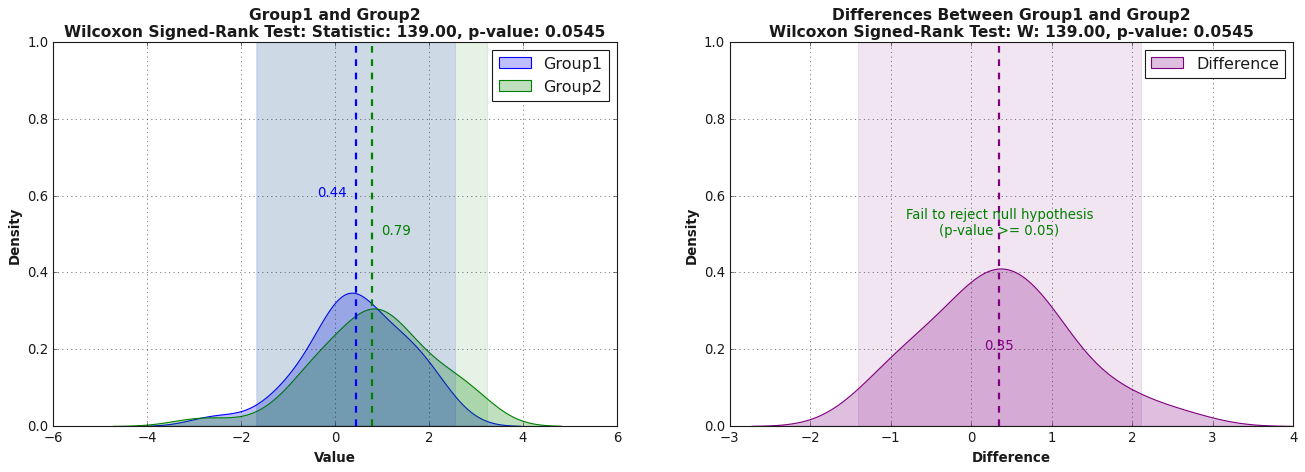

In [9]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Generate sample data
np.random.seed(0)
group1 = np.random.normal(loc=0, scale=1, size=30)
group2 = group1 + np.random.normal(loc=0.64, scale=1, size=30)

# Create a DataFrame
data = pd.DataFrame({'Group1': group1, 'Group2': group2})

# Perform the Wilcoxon signed-rank test
stat, p_value = stats.wilcoxon(data['Group1'], data['Group2'])
print(f'Statistic: {stat}, p-value: {p_value}')

# Calculate the means and confidence intervals
mean_group1 = data['Group1'].mean()
mean_group2 = data['Group2'].mean()

lower_bound1 = stats.norm.ppf(0.025, mean_group1, np.std(data['Group1']))
upper_bound1 = stats.norm.ppf(0.975, mean_group1, np.std(data['Group1']))

lower_bound2 = stats.norm.ppf(0.025, mean_group2, np.std(data['Group2']))
upper_bound2 = stats.norm.ppf(0.975, mean_group2, np.std(data['Group2']))

# Plot the data with KDE plots and rejection zones
plt.figure(figsize=(20, 6), frameon=False)
plt.subplot(1, 2, 1)
sns.kdeplot(data=data, x='Group1', fill=True, color='blue', label='Group1')
sns.kdeplot(data=data, x='Group2', fill=True, color='green', label='Group2')

# Highlight the means
plt.axvline(mean_group1, color='blue', linestyle='--', linewidth=2)
plt.axvline(mean_group2, color='green', linestyle='--', linewidth=2)
plt.text(mean_group1-0.5, 0.6, f'{mean_group1:.2f}', horizontalalignment='center', color='blue')
plt.text(mean_group2+0.5, 0.5, f'{mean_group2:.2f}', horizontalalignment='center', color='green')

# Add rejection zones
plt.fill_betweenx([0, 1], lower_bound1, upper_bound1, color='blue', alpha=0.1)
plt.fill_betweenx([0, 1], lower_bound2, upper_bound2, color='green', alpha=0.1)

# Add test results to the plot
plt.title(f'Group1 and Group2\nWilcoxon Signed-Rank Test: Statistic: {stat:.2f}, p-value: {p_value:.4f}', fontsize=14, fontweight='bold')
plt.xlabel('Value', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True)

# Plot the differences with KDE plot
data['Difference'] = data['Group2'] - data['Group1']
plt.subplot(1, 2, 2)
sns.kdeplot(data=data, x='Difference', fill=True, color='purple', label='Difference')

# Highlight the mean of differences
mean_diff = data['Difference'].mean()
plt.axvline(mean_diff, color='purple', linestyle='--', linewidth=2)
plt.text(mean_diff, 0.2, f'{mean_diff:.2f}', horizontalalignment='center', color='purple')

# Add rejection zones for differences
lower_diff = stats.norm.ppf(0.025, mean_diff, np.std(data['Difference']))
upper_diff = stats.norm.ppf(0.975, mean_diff, np.std(data['Difference']))
plt.fill_betweenx([0, 1], lower_diff, upper_diff, color='purple', alpha=0.1)

# Add test results to the plot
plt.title(f'Differences Between Group1 and Group2\nWilcoxon Signed-Rank Test: W: {stat:.2f}, p-value: {p_value:.4f}', fontsize=14, fontweight='bold')
plt.xlabel('Difference', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')

# Interpretation
if p_value < 0.05:
    plt.text(mean_diff, 0.5, 'Reject null hypothesis\n(p-value < 0.05)', horizontalalignment='center', color='red')
else:
    plt.text(mean_diff, 0.5, 'Fail to reject null hypothesis\n(p-value >= 0.05)', horizontalalignment='center', color='green')

plt.legend()
plt.grid(True)
plt.savefig(f'../../results/plots/groups_stat.svg')


     PID  Age Laterality T_UT  Volume_area  EZ_width BL   M12
0   P001   28         OD    T     5.207075     1.207791   CIP
1   P001   28         OS    T    18.401127     4.492123    CP
2   P002   23         OD    T    15.153469     5.045151   CIP
3   P002   23         OS    T    18.609040     4.916232   CIP
5   P003   29         OS    T     1.514644     0.000000   CIP
6   P004    9         OD    T     9.614513     3.865161  None
7   P004    9         OS    T     8.873353     3.389100  None
8   P005    7         OD    T    41.579183     5.933718  None
9   P005    7         OS    T    41.955870     5.955029  None
10  P006   32         OD    T     4.014299     2.333568  None
11  P006   32         OS    T          NaN     2.494014  None
12  P007   38         OD    T     1.381149     0.202178  None
13  P007   38         OS    T     0.655033     0.201594  None
14  P008   28         OD    T          NaN     2.380522    IP
15  P008   28         OS    T          NaN     1.002769  None
16  P009

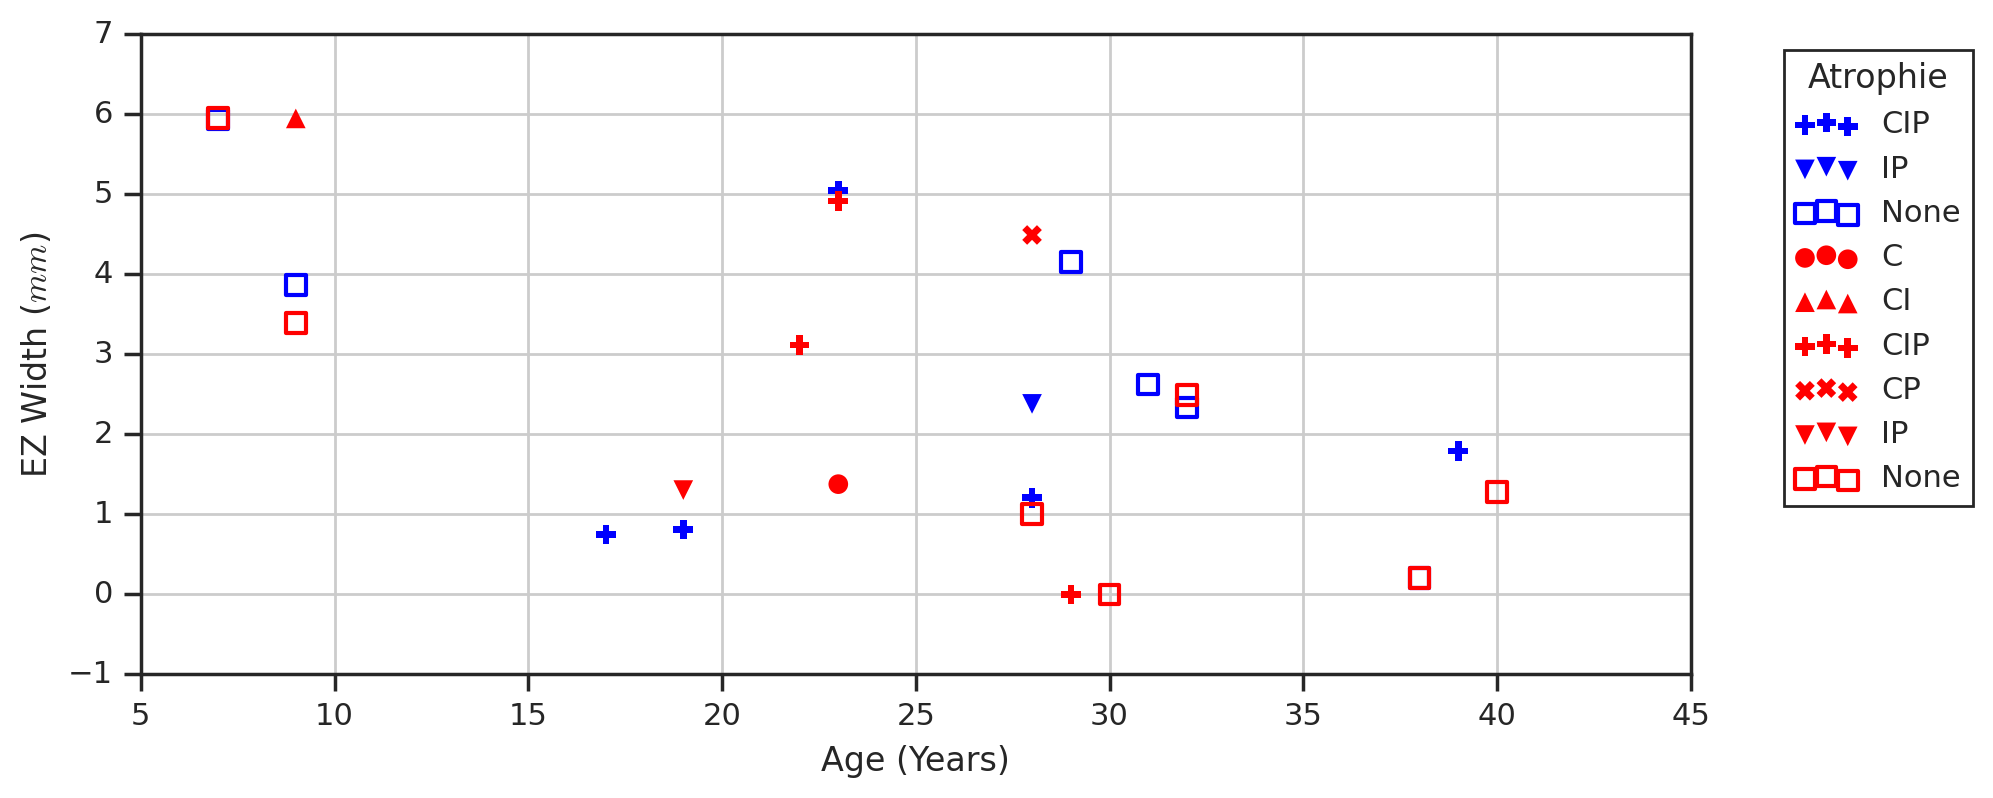

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

# Read the specified columns from the CSV file
columns_to_read = ['Age', 'Laterality', 'Volume_area', 'EZ_width BL', 'M12', 'PID', 'T_UT']
df_new = pd.read_csv('../../table_new1.csv', usecols=columns_to_read)

# Define a custom marker mapping
marker_mapping = {
    'C': 'o',
    'IP': 'v',
    'CI': '^',
    'CIP': 'P',
    'CP': 'X',
    'None': 's'
}

# Define a custom color mapping for Laterality
color_mapping = {
    'OD': 'blue',
    'OS': 'red'
}

# Filter the dataframe to include only patients with atrophie
atrophie_conditions = ['C', 'IP', 'CI', 'CIP', 'CP', 'None']

df_new.replace(pd.NA, 'UT', inplace=True)
df_filtered = df_new[df_new['M12'].isin(atrophie_conditions)]
print(df_filtered)
# Set up the plot
plt.figure(figsize=(10, 4), dpi=200)
sns.set(style="ticks", rc={"lines.linewidth": "0.7"})

# Plot each category manually
handles = []
for (laterality, m12), group_data in df_filtered.groupby(['Laterality', 'M12']):
    marker = marker_mapping[m12]
    color = color_mapping[laterality]
    
    for _, row in group_data.iterrows():
        x = row['Age']
        y = row['EZ_width BL']
        
        # Desaturate color if T_UT is UT
        facecolor = to_rgba(color, alpha=0.4) if row['T_UT'] == 'UT' else color
        
        # Plot marker
        scatter = plt.scatter(
            x,
            y,
            marker=marker,
            facecolor=color if m12 != 'None' and m12 != 'UT' else facecolor if m12 == 'UT' else 'none',  # Hollow for None
            edgecolor=color if m12 == 'None' else 'none',
            s=50,
            linewidths=1.5
        )
    
    # Add a single handle per (Laterality, M12) combination for legend
    handles.append(scatter)

# Add custom legend
labels = [f"{m12}" for laterality, m12 in df_filtered.groupby(['Laterality', 'M12']).groups.keys()]
plt.legend(handles=handles, labels=labels, title="Atrophie", bbox_to_anchor=(1.05, 1), loc='upper left')

# Labels and grid
plt.xlabel('Age (Years)')
plt.ylabel(r'EZ Width ($mm$)')
plt.grid(True)

# Show the plot
plt.savefig('plot2.svg')

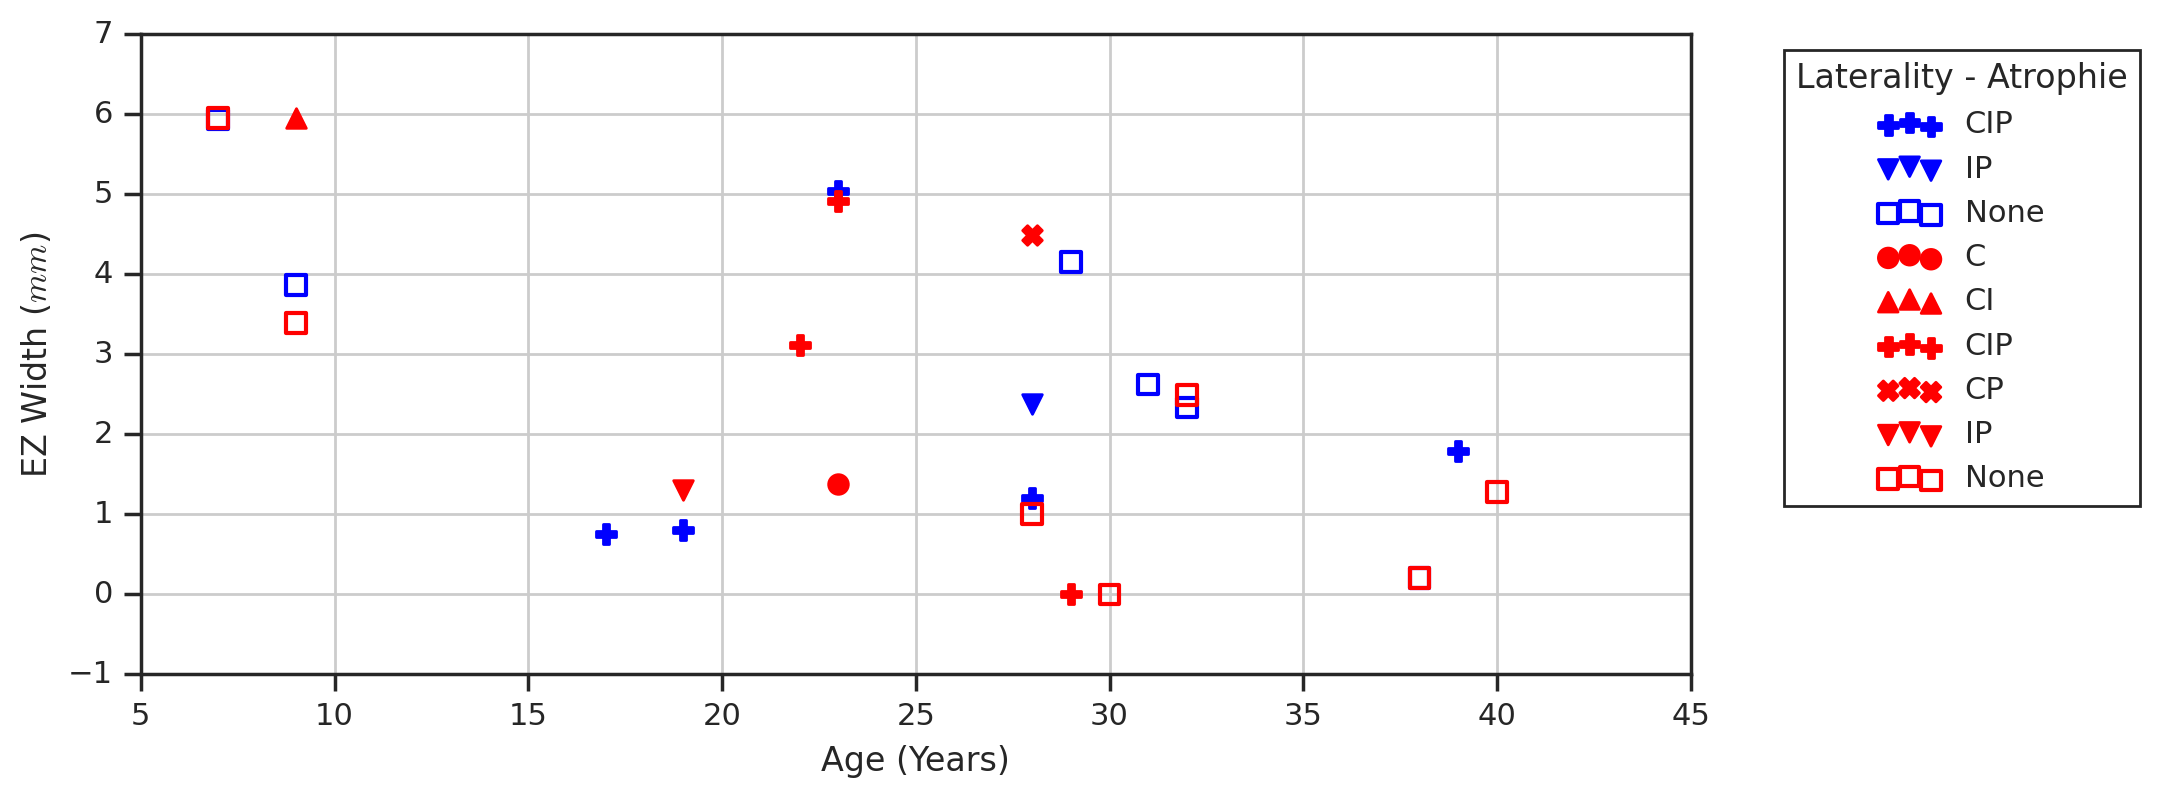

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the specified columns from the CSV file
columns_to_read = ['Age', 'Laterality', 'Volume_area', 'EZ_width BL', 'M12', 'PID']
df_new = pd.read_csv('../../table_new1.csv', usecols=columns_to_read)

# Define a custom marker mapping
marker_mapping = {
    'C': 'o',
    'IP': 'v',
    'CI': '^',
    'CIP': 'P',
    'CP': 'X',
    'None': 's'
}

# Define a custom color mapping for Laterality
color_mapping = {
    'OD': 'blue',
    'OS': 'red'
}

# Filter the dataframe to include only patients with atrophie
atrophie_conditions = ['C', 'IP', 'CI', 'CIP', 'CP', 'None']
df_filtered = df_new[df_new['M12'].isin(atrophie_conditions)]

# Set up the plot
plt.figure(figsize=(10, 4), dpi=200)
sns.set(style="ticks", rc={"lines.linewidth": 0.7})
handles = []
# Plot each category manually.
for (laterality, m12), group_data in df_filtered.groupby(['Laterality', 'M12']):
    marker = marker_mapping[m12]
    color = color_mapping[laterality]  # Color based on Laterality
    if m12 == 'None':  # Hollow square markers
        scatter = plt.scatter(
            group_data['Age'],
            group_data['EZ_width BL'],
            marker=marker,
            facecolors='none',  # Hollow
            edgecolors=color,   # Edge depends on Laterality
            s=50,
            linewidths=1.5      # Enhance the visibility of edges
        )
    else:
        scatter = plt.scatter(
            group_data['Age'],
            group_data['EZ_width BL'],
            marker=marker,
            color=color,  # Filled with OD/OS color
            s=50
        )
    
    # Manually create the legend entry
    handles.append(scatter)

# Add custom legend
labels = [f"{m12}" for laterality, m12 in df_filtered.groupby(['Laterality', 'M12']).groups.keys()]
plt.legend(handles=handles, labels=labels, title="Laterality - Atrophie", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Age (Years)')
plt.ylabel(r'EZ Width ($mm$)')
# handles, labels = plt.gca().get_legend_handles_labels()

# new_handles = [h for h, l in zip(handles, labels) if l in atrophie_conditions or l in color_mapping.keys()]
# new_labels = [l for l in labels if l in atrophie_conditions or l in color_mapping.keys()]
# plt.legend(new_handles, new_labels, title='Atrophies and Laterality', bbox_to_anchor=(0.85, 1.01), loc="lower right", fontsize="9", ncol=8, title_fontsize="10")
plt.grid(True)
plt.show()

# # Define a custom marker mapping
# marker_mapping = {
#     'C': 'o',
#     'IP': 'v',
#     'CI': '^',
#     'CIP': 'P',
#     'CP': 'X',
#     'None': 's'
# }

# # Define a custom color mapping for Laterality
# color_mapping = {
#     'OD': 'blue',
#     'OS': 'red'
# }

# # Filter the dataframe to include only patients with atrophie
# atrophie_conditions = ['C', 'IP', 'CI', 'CIP', 'CP', 'None']
# df_filtered = df_new[df_new['M12'].isin(atrophie_conditions)]
# print(df_filtered)
# plt.style.use("default")
# plt.figure(figsize=(10, 4), dpi=200)
# sns.set(style="ticks", rc={"lines.linewidth": 0.7})

# # Generate the scatter plot
# scatter = sns.scatterplot(data=df_filtered, x='Age', y='EZ_width', hue='Laterality', style='M12', palette=color_mapping, markers=marker_mapping, s=50)

# # Manually update markers for 'None' to be hollow
# for handle, style_label in zip(scatter.legend_.legendHandles, marker_mapping.keys()):
#     if style_label == 'None':  # Check for 'None' style label
#         handle.set_markerfacecolor('none')  # Remove fill
#         handle.set_markeredgecolor('black')  # Set edge color

# # Adjust the actual plot markers (for legend consistency)
# for path_collection in scatter.collections:
#     # Retrieve associated style label
#     style_label = path_collection.get_label()
#     if style_label == 'None':  # Match 'None' category in plot
#         path_collection.set_facecolor('none')  # Remove marker face color
#         path_collection.set_edgecolor('black')  # Add black edge


# plt.xlabel('Age (Years)')
# plt.ylabel(r'EZ Width ($mm$)')
# handles, labels = plt.gca().get_legend_handles_labels()
# # Remove 'Laterality' and 'M12' from the legend
# # Remove 'Laterality' and 'M12' from the legend
# new_handles = [h for h, l in zip(handles, labels) if l in atrophie_conditions or l in color_mapping.keys()]
# new_labels = [l for l in labels if l in atrophie_conditions or l in color_mapping.keys()]
# plt.legend(new_handles, new_labels, title='Atrophies and Laterality', bbox_to_anchor=(0.85, 1.01), loc="lower right", fontsize="9", ncol=8, title_fontsize="10")
# plt.grid(True)
# plt.show()

# plt.figure(figsize=(10, 4), dpi=200)
# sns.set(style="ticks", rc={"lines.linewidth": 0.7})

# # Generate the scatter plot
# sns.scatterplot(data=df_filtered, x='Age', y='Volume_area', hue='Laterality', style='M12', palette=color_mapping, markers=marker_mapping, s=50)

# plt.xlabel('Age (Years)')
# plt.ylabel(r'EZ_{Area} ($mm^2$)')
# handles, labels = plt.gca().get_legend_handles_labels()
# # Remove 'Laterality' and 'M12' from the legend
# # Remove 'Laterality' and 'M12' from the legend
# new_handles = [h for h, l in zip(handles, labels) if l in atrophie_conditions or l in color_mapping.keys()]
# new_labels = [l for l in labels if l in atrophie_conditions or l in color_mapping.keys()]
# plt.legend(new_handles, new_labels, title='Atrophies and Laterality', bbox_to_anchor=(0.85, 1.01), loc="lower right", fontsize="9", ncol=8, title_fontsize="10")
# plt.grid(True)
# plt.show()